In [3]:
%load_ext autoreload
%autoreload 2
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd


def get_image_path(tomo_id):
    #img_dir = '../data/pictures_process/mean_image_padded'
    img_dir = '../data/pictures_process/adaptequal_05_padded'
    return os.path.join(img_dir, f'{tomo_id}.jpg')


def get_xy(tomo_id):
    csv_path = '../data/csv_raw/train_labels.csv'
    df = pd.read_csv(csv_path)
    y = df[df['tomo_id'] == tomo_id]['Motor_axis_1'].values[0]
    x = df[df['tomo_id'] == tomo_id]['Motor_axis_2'].values[0]
    return x, y

def get_tomo_ids():
    csv_path = '../data/csv_raw/train_labels.csv'
    df = pd.read_csv(csv_path)
    df_1_moteur = df[df['Number_of_motors'] == 1]
    return df_1_moteur['tomo_id'].unique()

X = []
y = []
for tomo_id in get_tomo_ids():
    xm, ym = get_xy(tomo_id)
    image_path = get_image_path(tomo_id)
    img = load_img(image_path)
    img_norm = img_to_array(img) / 255.0        # Charger et redimensionner
    X.append(img_norm)               # Convertir en array, normaliser [0,1]
    y.append((xm, ym))

npX = np.array(X)
npy = np.array(y)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:

from tensorflow.keras import Sequential, Input, layers

model = Sequential()
model.add(Input(shape=(960, 960, 3)))
model.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(4, kernel_size=(3), activation='relu')) # kernel_size = 3 <==> (3, 3)
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='linear'))
model.summary()

# model = Sequential()
# model.add(Input(shape=(960, 960, 3)))
# model.add(layers.Conv2D(16, 3, activation='relu'))
# model.add(layers.MaxPooling2D(2))
# model.add(layers.Conv2D(32, 3, activation='relu'))
# model.add(layers.MaxPooling2D(2))
# model.add(layers.Conv2D(64, 3, activation='relu'))
# model.add(layers.MaxPooling2D(2))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(2, activation='linear'))
# model.summary()

model.compile(
    optimizer='adam',
    loss='mae',        
    metrics=['mae'] 
)
model.summary()

2025-06-04 11:46:21.910747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 958, 958, 6)       168       
                                                                 
 conv2d_1 (Conv2D)           (None, 956, 956, 4)       220       
                                                                 
 flatten (Flatten)           (None, 3655744)           0         
                                                                 
 dense (Dense)               (None, 2)                 7311490   
                                                                 
Total params: 7,311,878
Trainable params: 7,311,878
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)          

In [5]:
history = model.fit(
    npX, 
    npy,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/5
8/8 [==============================] - 107s 12s/step - loss: 251.2625 - mae: 251.2625 - val_loss: 194.9217 - val_mae: 194.9217
Epoch 2/5
8/8 [==============================] - 91s 11s/step - loss: 185.0348 - mae: 185.0348 - val_loss: 131.2746 - val_mae: 131.2746
Epoch 3/5
8/8 [==============================] - 69s 8s/step - loss: 166.6368 - mae: 166.6368 - val_loss: 131.6062 - val_mae: 131.6062
Epoch 4/5
8/8 [==============================] - 57s 7s/step - loss: 151.0417 - mae: 151.0417 - val_loss: 118.3356 - val_mae: 118.3356
Epoch 5/5
8/8 [==============================] - 58s 7s/step - loss: 133.7139 - mae: 133.7139 - val_loss: 114.2154 - val_mae: 114.2154


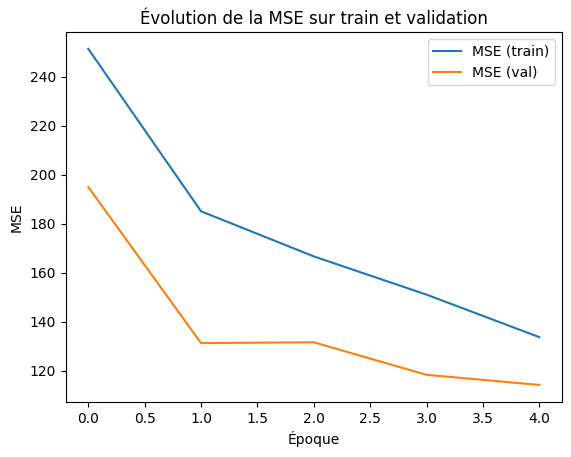

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='MSE (train)')
plt.plot(history.history['val_mae'], label='MSE (val)')
plt.xlabel('Époque')
plt.ylabel('MSE')
plt.legend()
plt.title('Évolution de la MSE sur train et validation')
plt.show()

In [8]:
import sys
sys.path.append('../src')
from utils.render_motor_position import draw_on_image


predictions = model.predict(npX)
for i in range(len(get_tomo_ids())):
    tomo_id = get_tomo_ids()[i]
    x, y = get_xy(tomo_id)
    #x_pred = y_pred = -1
    x_pred, y_pred = predictions[i]
    image_path = get_image_path(tomo_id)
    draw_on_image(image_path, '../data/pictures_process/motor_position_predict/', x, y, x_pred, y_pred)
    #print(image_path)



10/10 [==============================] - 23s 2s/step


In [9]:
predictions

array([[478.52466, 532.9223 ],
       [480.0962 , 534.94165],
       [480.16876, 533.133  ],
       [470.78586, 523.84705],
       [481.05978, 535.5329 ],
       [462.52234, 520.7825 ],
       [499.59308, 564.2683 ],
       [466.3803 , 503.21024],
       [387.19492, 417.04367],
       [511.3368 , 572.5296 ],
       [490.67307, 543.6943 ],
       [493.72314, 546.0667 ],
       [514.52484, 574.7585 ],
       [473.74677, 527.2495 ],
       [506.7984 , 565.0363 ],
       [547.78937, 608.1314 ],
       [493.30396, 554.2593 ],
       [481.56683, 540.8047 ],
       [498.08792, 558.1854 ],
       [403.76025, 453.20273],
       [497.84387, 558.5246 ],
       [424.61145, 465.01767],
       [434.4364 , 473.62924],
       [438.99954, 478.6692 ],
       [476.45654, 523.45306],
       [479.16766, 526.43176],
       [479.3251 , 533.8985 ],
       [518.23584, 568.04565],
       [488.9378 , 553.1922 ],
       [458.79614, 496.4081 ],
       [439.16583, 484.3289 ],
       [480.1496 , 535.70386],
       [